In [1]:
%matplotlib inline
import numpy as np
from pathlib import Path
import glob2

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#database, subfolder = 'pitt', 'fluency'
#database, subfolder = 'adress', 'full'
database, subfolder = 'pitt', 'cookie'
folder_control = f'../data/processed/control/{database}/{subfolder}/'
folder_dementia = f'../data/processed/dementia/{database}/{subfolder}/'

In [3]:
control_files = [ Path(p).absolute() for p in glob2.glob(folder_control + '/*') ]
dementia_files = [ Path(p).absolute() for p in glob2.glob(folder_dementia + '/*') ]
print('Database (subfolder):', database, f'({subfolder})')
print('Nb control_files:', len(control_files))
print('Nb dementia_files:', len(dementia_files))

Database (subfolder): pitt (cookie)
Nb control_files: 243
Nb dementia_files: 303


In [4]:
control_data = [ np.load(a) for a in control_files ]
dementia_data = [ np.load(a) for a in dementia_files ]

In [5]:
control_data = [a[0] for a in control_data]
dementia_data = [a[0] for a in dementia_data]

In [6]:
control_data = [a.mean(axis=0) for a in control_data]
dementia_data = [a.mean(axis=0) for a in dementia_data]

In [7]:
from sklearn.manifold import TSNE

In [8]:
X = np.array(control_data + dementia_data)

In [9]:
X_embedded = TSNE(
    n_components=2).fit_transform(X)

/zhome/c1/d/164546/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/zhome/c1/d/164546/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


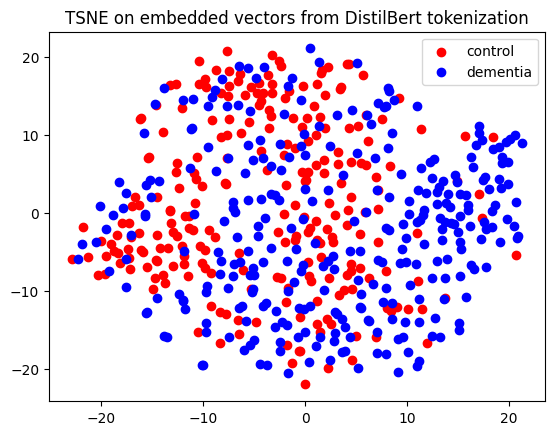

In [10]:
plt.title('TSNE on embedded vectors from DistilBert tokenization')
plt.scatter(X_embedded.T[0][:len(control_data)], X_embedded.T[1][:len(control_data)], label='control', c='r')
plt.scatter(X_embedded.T[0][len(control_data):], X_embedded.T[1][len(control_data):], label='dementia', c='b')
plt.legend()
plt.show()